In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
with open("/home/lorenzo/catkin_ws/src/underground_semantic_navigation_ROS/automatic_testing/scripts/total_results.txt", "r") as f:
    original_text = f.read()

In [8]:
lines = original_text.split("\n")
list_of_results = []
for line in lines:
    splitted = line.split("||")
    if splitted.__len__() == 4:
        success = int(splitted[0].strip() == "success")
        intersections = int(splitted[2].strip())
        obstacles = int(splitted[3].strip())
        list_of_results.append((success, intersections, obstacles))

In [12]:
def get_ratio_for_tiles_obs(res_list, tiles, obs):
    successful = 0
    total = 0
    for result in res_list:
        if result[1] == tiles and result[2] == obs:
            successful += result[0]
            total += 1
    return successful / total


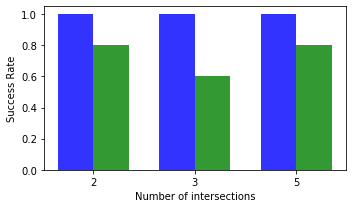

In [51]:
TILES = [2,3,5]
OBSTACLES = [0,1]
array_to_plot = []
for tile in OBSTACLES:
    array_to_plot.append([])
    for obs in TILES:
        array_to_plot[-1].append(get_ratio_for_tiles_obs(list_of_results,obs, tile))

indices = np.arange(TILES.__len__())


n_groups = 3
# create plot
fig, ax = plt.subplots()
fig.set_size_inches((5,3))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, array_to_plot[0], bar_width,
alpha=opacity,
color='b',
label='0 obstacles per tile')

rects2 = plt.bar(index + bar_width, array_to_plot[1], bar_width,
alpha=opacity,
color='g',
label='1 obstacles per tile')



plt.xlabel('Number of intersections',fontsize=10)
plt.ylabel('Success Rate',fontsize=10)
plt.xticks(index + bar_width/2, ('2', '3','5'),fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()